## Dataset
#### Context
A different dataset for object detection. 240 images in train folder. 60 images in test folder.

#### Content
3 different fruits:

Apple

Banana

Orange

#### Acknowledgements
.xml files were created with LabelImg. It is super easy to label objects in images.

Dataset is from: https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection

Coco weights can be downloaded from: https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [2]:
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib.patches import Rectangle

# define the prediction configuration
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "fruits_cfg"
    # number of classes (background + 3 fruits)
    NUM_CLASSES = 1 + 3
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load saved model weights
model.load_weights('Fruits_MaskRCNN_trained.h5', by_name=True)

Using TensorFlow backend.


In [3]:
from skimage import io

img1=io.imread('./Fruit_01.jpg')
img2=io.imread('./Fruit_02.jpg')

detect_img1 = model.detect([img1])[0]  
detect_img2 = model.detect([img2])[0]

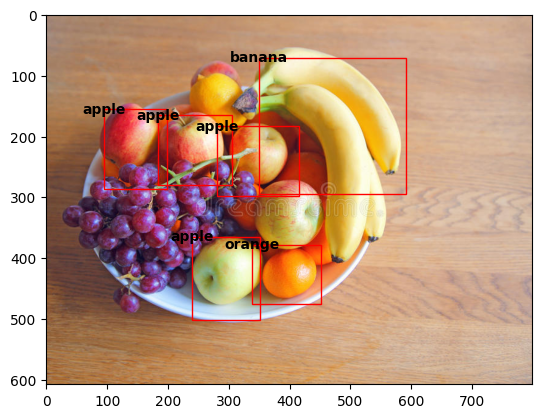

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img1)
ax = plt.gca()
class_names = ['apple', 'banana', 'orange']
class_id_counter=1

for box in detect_img1['rois']:
    #print(box)
    # coordinates
    detected_class_id = detect_img1['class_ids'][class_id_counter-1]
    #print(detected_class_id)
    #print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    #draw the box
    ax.add_patch(rect)
    class_id_counter+=1

plt.show()

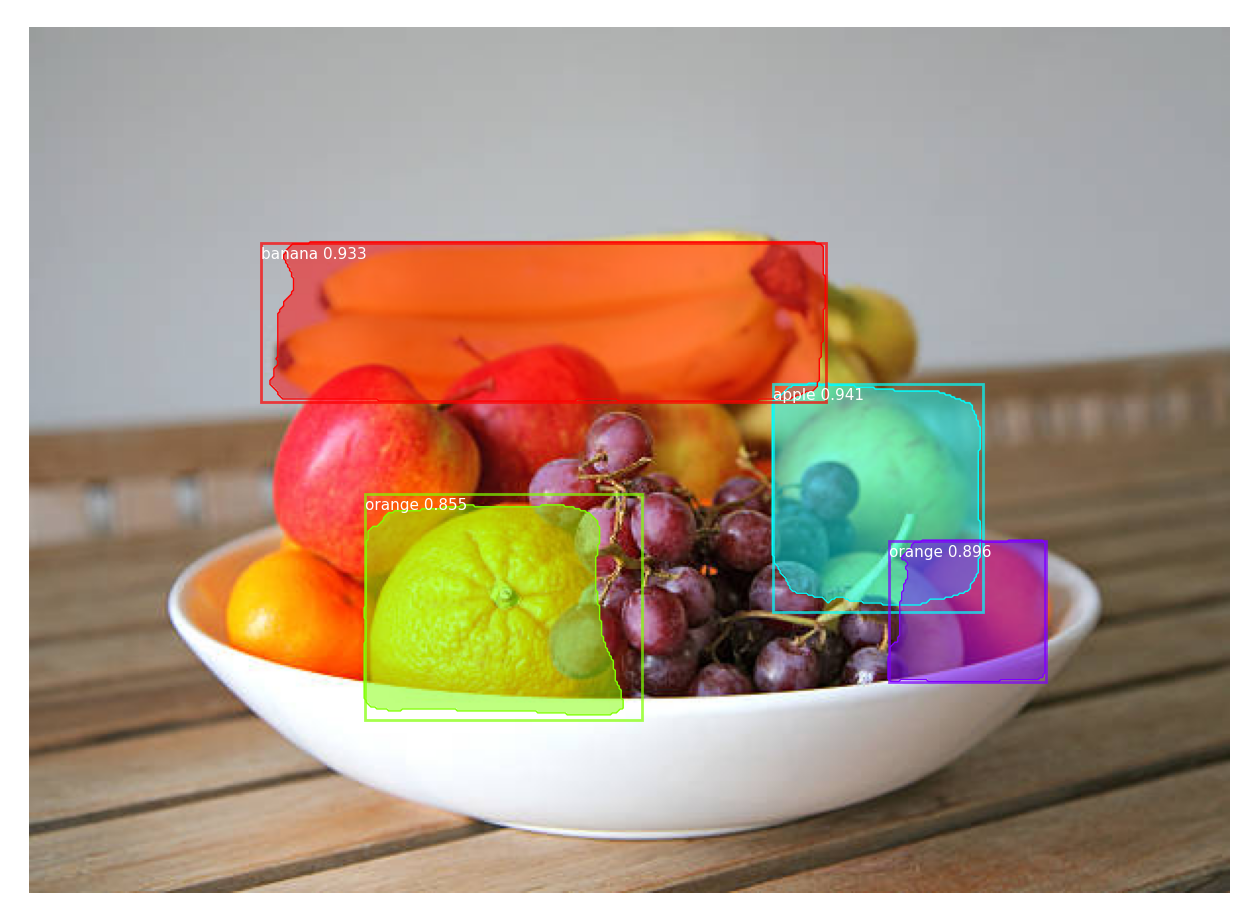

In [5]:
import mrcnn.visualize
CLASS_NAMES=['BG','apple', 'banana', 'orange']

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=img2, 
                                  boxes=detect_img2['rois'], 
                                  masks=detect_img2['masks'], 
                                  class_ids=detect_img2['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=detect_img2['scores'])